## Learning embeddings with LTN

A classic example of Statistical Relational Learning is the smokers-friends-cancer example introduced in the paper
about Markov Logic Networks. Below, we show how this example can be formalized in LTN using semi-supervised
embedding learning.

The problem is the following. There are 14 people divided into two groups $\{a, b, \dots, h\}$ and $\{i, j, \dots, n\}$.
Within each group, there is complete knowledge about smoking habits. In the first group, there is complete knowledge
about who has and who does not have cancer. Knowledge about the friendship relation is complete within each group only
if symmetry is assumed, that is, $\forall x,y \text{ } (friends(x,y) \implies friends(y,x))$. Otherwise, knowledge about
friendship is incomplete in that it may be known that e.g. $a$ is a friend of $b$, and it may be not known whether
$b$ is a friend of $a$. Finally, there is general knowledge about smoking, friendship and cancer, namely that smoking
causes cancer, friendship is normally symmetric and anti-reflexive, everyone has a friend, and smoking propagates
(actively or passively) among friends. All this knowledge is represented in the axioms further below.

For this specific task, LTN uses the following language and grounding:

**Domains:**
- $people$, denoting the individuals of the smokers-friends-cancer dataset.

**Variables:**
- $x, y$ ranging over the individuals;
- $D(x) = D(y) = people$.

**Constants:**
- $a, b, \dots, h, i, j, \dots, n$, the 14 individuals. Our goal is to learn an adequate embedding for each constant;
- $D(a) = D(b) = \dots = D(n) = people$.

**Predicates:**
- $S(x)$ for *smokes*, $F(x,y)$ for *friends*, $C(x)$ for *cancer*;
- $D_{in}(S) = D_{in}(C) = people$;
- $D_{in}(F) = people,people$.

**Axioms:**

Let $\mathcal{X}_1 = \{a, b, \dots, h\}$ and $\mathcal{X}_2 = \{i, j, \dots, n\}$ be the two set of individuals.

Let $\mathcal{S} = \{a, e, f, g, j, n\}$ be the set of the smokers. Knowledge is complete in both groups.

Let $\mathcal{C} = \{a, e\}$ be the set of individuals with cancer. Knowledge is complete on $\mathcal{X}_1$ only.

Let $\mathcal{F} = \{(a,b), (a,e), (a, f), (a, g), (b, c), (c, d), (e, f), (g, h), (i, j), (j, m), (k, l), (m, n)\}$ be the
set of friendship relations. Knowledge is complete if assuming symmetry.

These facts are illustrated in the following figure.

![Facts](./images/facts.png)

We have the following axioms:
- $F(u,v)$ for $(u, v) \in \mathcal{F}$;
- $\lnot F(u, v)$ for $(u, v) \notin \mathcal{F}, u > v$;
- $S(u)$ for $u \in \mathcal{S}$;
- $\lnot S(u)$ for $u \in (\mathcal{X}_1 \cup \mathcal{X}_2) \backslash \mathcal{S}$;
- $C(u)$ for $u \in \mathcal{C}$;
- $\lnot C(u)$ for $u \in \mathcal{X}_1 \backslash \mathcal{C}$;
- $\forall x \text{ } \lnot F(x,x)$;
- $\forall x, y \text{ } (F(x, y) \implies F(y,x))$;
- $\forall x \exists y \text{ } F(x,y)$;
- $\forall x, y \text{ } ((F(x, y) \land S(x)) \implies S(y))$;
- $\forall x \text{ } (S(x) \implies C(x))$;
- $\forall x \text{ } (\lnot C(x) \implies \lnot S(x))$.

Notice that the knowledge base is not satisfiable in the strict logical sense of the word. For instance, $f$ is said to
smoke but not to have cancer, which is inconsistent with the rule $\forall x \text{ } (S(x) \implies C(x))$. Hence, it
is important to adopt a probabilistic approach as done with MLN or a many-valued fuzzy logic interpretation as done
with LTN. This allows to relax the constraints, leading to soft constraints. With soft constraints, it is possible to find
a solution which maximally satisfy all the constraints and better generalizes real world data compared to hard constrains.

**Grounding:**
- $\mathcal{G}(people)=\mathbb{R}^{5}$. The model is expected to learn embeddings in $\mathbb{R}^{5}$;
- $\mathcal{G}(a \mid \theta)=\mathbf{v}_\theta(a), \dots \mathcal{G}(n \mid \theta)=\mathbf{v}_\theta(n)$, where with
$\mathbf{v}_\theta(x)$ we denote the vector containing the parameters of individual $x$, namely the embedding of $x$.
Every individual is associated with a vector of 5 real numbers. The embedding is initialized randomly and uniformly;
- $\mathcal{G}(x \mid \theta)=\mathcal{G}(y \mid \theta) = \langle \mathbf{v}_\theta(a), \dots, \mathbf{v}_\theta(n) \rangle$, namely variables
$x$ and $y$ are sequences of embeddings of the individuals in the dataset;
- $\mathcal{G}(S \mid \theta) : x \mapsto \sigma(\operatorname{MLP\_S}_\theta(x))$, where $\operatorname{MLP\_S}_\theta$
has 1 output neuron. In other words, $S$ returns the probability that $x$ is a smoker, given its features (embedding) in
input;
- $\mathcal{G}(F \mid \theta) : x,y \mapsto \sigma(\operatorname{MLP\_F}_\theta(x,y))$, where $\operatorname{MLP\_F}_\theta$
has 1 output neuron. In other words, $F$ returns the probability that $x$ and $y$ are friends, given their features (embeddings) in
input;
- $\mathcal{G}(C \mid \theta) : x \mapsto \sigma(\operatorname{MLP\_C}_\theta(x))$, where $\operatorname{MLP\_C}_\theta$
has 1 output neuron. In other words, $C$ returns the probability that $x$ has cancer, given its features (embedding) in
input.

The *MLP* models for $S$, $F$, and $C$ are kept simple, so that most of the learning is focused on the embeddings.

### Dataset

Now, let's create our dataset, according to the specification defined above.

In order to define the dataset, it is enough to create an embedding in $\mathbb{R}^5$ for each individual. The individuals
will be represented in LTN by learnable constants containing the embeddings of the individuals.

Then, we have to define our knowledge, namely the two groups of people, who has cancer, who is a smoker, and the set of
friendship relations.

## 使用 LTN 学习嵌入

统计关系学习的一个经典例子是论文中介绍的吸烟者-朋友-癌症的例子。下面，我们展示如何使用 LTN 通过半监督嵌入学习来形式化这个例子。

问题如下：有 14 个人分为两组 $\{a, b, \dots, h\}\) 和 $\{i, j, \dots, n\}\)。在每组内，有关于吸烟习惯的完整知识。在第一组中，有关于谁患有癌症和谁没有患癌症的完整知识。关于友谊关系的知识在每组内是完整的，只要假设对称性，即 $\forall x,y \text{ } (friends(x,y) \implies friends(y,x))\)。否则，关于友谊的知识是不完整的，比如已知 $a$ 是 $b$ 的朋友，但可能不知道 $b$ 是否是 $a$ 的朋友。最后，有关于吸烟、友谊和癌症的一般知识，即吸烟导致癌症，友谊通常是对称且反身的，每个人都有朋友，吸烟在朋友之间传播（主动或被动）。所有这些知识都在下面的公理中表示。

对于这个特定任务，LTN 使用以下语言和基础：

**领域：**
- $people$，表示吸烟者-朋友-癌症数据集中的个体。

**变量：**
- $x, y$ 范围涵盖所有个体；
- $D(x) = D(y) = people$。

**常量：**
- $a, b, \dots, h, i, j, \dots, n$，这 14 个个体。我们的目标是为每个常量学习一个合适的嵌入；
- $D(a) = D(b) = \dots = D(n) = people$。

**谓词：**
- $S(x)$ 表示 *smokes*，$F(x,y)$ 表示 *friends*，$C(x)$ 表示 *cancer*；
- $D_{in}(S) = D_{in}(C) = people$；
- $D_{in}(F) = people,people$。

**公理：**

设 $\mathcal{X}_1 = \{a, b, \dots, h\}$ 和 $\mathcal{X}_2 = \{i, j, \dots, n\}$ 为两组个体。

设 $\mathcal{S} = \{a, e, f, g, j, n\}$ 为吸烟者集合。两组的知识都是完整的。

设 $\mathcal{C} = \{a, e\}$ 为患癌症的个体集合。知识仅在 $\mathcal{X}_1$ 上是完整的。

设 $\mathcal{F} = \{(a,b), (a,e), (a, f), (a, g), (b, c), (c, d), (e, f), (g, h), (i, j), (j, m), (k, l), (m, n)\}$ 为友谊关系集合。假设对称性时，知识是完整的。

这些事实在下图中有所说明。

![Facts](./images/facts.png)

我们有以下公理：
- $F(u,v)$ 对于 $(u, v) \in \mathcal{F}$；
- $\lnot F(u, v)$ 对于 $(u, v) \notin \mathcal{F}, u > v$；
- $S(u)$ 对于 $u \in \mathcal{S}$；
- $\lnot S(u)$ 对于 $u \in (\mathcal{X}_1 \cup \mathcal{X}_2) \backslash \mathcal{S}$；
- $C(u)$ 对于 $u \in \mathcal{C}$；
- $\lnot C(u)$ 对于 $u \in \mathcal{X}_1 \backslash \mathcal{C}$；
- $\forall x \text{ } \lnot F(x,x)$；
- $\forall x, y \text{ } (F(x, y) \implies F(y,x))$；
- $\forall x \exists y \text{ } F(x,y)$；
- $\forall x, y \text{ } ((F(x, y) \land S(x)) \implies S(y))$；
- $\forall x \text{ } (S(x) \implies C(x))$；
- $\forall x \text{ } (\lnot C(x) \implies \lnot S(x))$。

注意，这个知识库在严格逻辑意义上并不是可满足的。例如，$f$ 被认为吸烟但没有患癌症，这与规则 $\forall x \text{ } (S(x) \implies C(x))$ 不一致。因此，采用概率方法（如 MLN）或多值模糊逻辑解释（如 LTN）是很重要的。这允许放松约束，导致软约束。通过软约束，可以找到最大程度上满足所有约束的解决方案，并且相比硬约束更好地泛化实际数据。

**基础：**
- $\mathcal{G}(people)=\mathbb{R}^{5}$。模型预计在 $\mathbb{R}^{5}$ 中学习嵌入；
- $\mathcal{G}(a \mid \theta)=\mathbf{v}_\theta(a), \dots \mathcal{G}(n \mid \theta)=\mathbf{v}_\theta(n)$，其中 $\mathbf{v}_\theta(x)$ 表示包含个体 $x$ 参数的向量，即 $x$ 的嵌入。每个个体与 5 个实数的向量相关联。嵌入随机均匀初始化；
- $\mathcal{G}(x \mid \theta)=\mathcal{G}(y \mid \theta) = \langle \mathbf{v}_\theta(a), \dots, \mathbf{v}_\theta(n) \rangle$，即变量 $x$ 和 $y$ 是数据集中个体嵌入的序列；
- $\mathcal{G}(S \mid \theta) : x \mapsto \sigma(\operatorname{MLP\_S}_\theta(x))$，其中 $\operatorname{MLP\_S}_\theta$ 有 1 个输出神经元。换句话说，$S$ 返回 $x$ 是吸烟者的概率，给定其输入特征（嵌入）；
- $\mathcal{G}(F \mid \theta) : x,y \mapsto \sigma(\operatorname{MLP\_F}_\theta(x,y))$，其中 $\operatorname{MLP\_F}_\theta$ 有 1 个输出神经元。换句话说，$F$ 返回 $x$ 和 $y$ 是朋友的概率，给定他们的输入特征（嵌入）；
- $\mathcal{G}(C \mid \theta) : x \mapsto \sigma(\operatorname{MLP\_C}_\theta(x))$，其中 $\operatorname{MLP\_C}_\theta$ 有 1 个输出神经元。换句话说，$C$ 返回 $x$ 患有癌症的概率，给定其输入特征（嵌入）。

对于 $S$、$F$ 和 $C$ 的 *MLP* 模型保持简单，以便大部分学习集中在嵌入上。

### 数据集

现在，让我们根据上面定义的规范创建我们的数据集。

为了定义数据集，足以为每个个体创建一个 $\mathbb{R}^5$ 中的嵌入。个体将在 LTN 中由包含个体嵌入的可学习常量表示。

然后，我们必须定义我们的知识，即两组人，谁患有癌症，谁是吸烟者，以及友谊关系集合。

In [5]:
import ltn
import torch

embedding_size = 5

# first group of people # 第一组人
g1 = {person: ltn.Constant(torch.rand((embedding_size,)), trainable=True) for person in 'abcdefgh'}
# second group of people # 第二组人
g2 = {person: ltn.Constant(torch.rand((embedding_size,)), trainable=True) for person in 'ijklmn'}
# group of all people # 所有人
g = {**g1, **g2}

# we define friendship relations, who has cancer and who is a smoker # 我们定义友谊关系，谁得了癌症，谁是吸烟者
friends = [('a', 'b'), ('a', 'e'), ('a', 'f'), ('a', 'g'), ('b', 'c'), ('c', 'd'), ('e', 'f'), ('g', 'h'),
               ('i', 'j'), ('j', 'm'), ('k', 'l'), ('m', 'n')]
smokes = ['a', 'e', 'f', 'g', 'j', 'n']
cancer = ['a', 'e']

### LTN setting

In order to define our knowledge base (axioms), we need to define predicates $F,C,S$,
connectives, quantifiers, and the `SatAgg` operator.

For the connectives and quantifiers, we use the stable product configuration (seen in the tutorials).

For predicates $F,C,S$, we use simple $MLP$ models with two hidden layers each.

`SatAgg` is defined using the `pMeanError` aggregator.

### LTN设置

为了定义我们的知识库（公理），我们需要定义谓词 $F,C,S$，连接词，量词，以及 `SatAgg` 操作符。

对于连接词和量词，我们使用稳定乘积配置（在教程中可以看到）。

对于谓词 $F,C,S$，我们使用简单的 $MLP$ 模型，每个模型有两层隐藏层。

`SatAgg` 使用 `pMeanError` 聚合器定义。

In [6]:
# we define predicates F, C, and S # 我们定义谓词F，C和S
class MLP(torch.nn.Module):
    """
    Simple MLP model used for defining the predicates of our problem.
    用于定义我们问题的谓词的简单 MLP 模型。
    """
    def __init__(self, layer_sizes=(10, 16, 16, 1)):
        super(MLP, self).__init__()
        self.elu = torch.nn.ELU()
        self.sigmoid = torch.nn.Sigmoid()
        self.linear_layers = torch.nn.ModuleList([torch.nn.Linear(layer_sizes[i - 1], layer_sizes[i])
                                                  for i in range(1, len(layer_sizes))])

    def forward(self, *x):
        """
        Given an individual x, the forward phase of this MLP returns the probability that the individual x is a smoker,or has cancer, or is friend of y (if given and predicate is F).

        :param x: individuals for which we have to compute the probability
        :return: the probability that individual x is a smoker, or has cancer, or is friend of y (if given)
        给定一个个体 $ x $，这个 MLP 的前向传播阶段返回个体 $ x $ 是吸烟者、患有癌症，或者是 $ y $ 的朋友（如果给定且谓词是 $ F $）的概率。

        :param x: 需要计算概率的个体
        :return: 个体 $ x $ 是吸烟者、患有癌症，或者是 $ y $ 的朋友（如果给定）的概率
        """
        x = list(x)
        if len(x) == 1:
            x = x[0]
        else:
            x = torch.cat(x, dim=1)
        for layer in self.linear_layers[:-1]:
            x = self.elu(layer(x))
        out = self.sigmoid(self.linear_layers[-1](x))
        return out

# C = ltn.Predicate(MLP(layer_sizes=(5, 16, 16, 1)))
# S = ltn.Predicate(MLP(layer_sizes=(5, 16, 16, 1)))
# F = ltn.Predicate(MLP(layer_sizes=(10, 16, 16, 1)))
C = ltn.Predicate(MLP(layer_sizes=(5, 16, 16, 1)).to(ltn.device))
S = ltn.Predicate(MLP(layer_sizes=(5, 16, 16, 1)).to(ltn.device))
F = ltn.Predicate(MLP(layer_sizes=(10, 16, 16, 1)).to(ltn.device))

# we define connectives, quantifiers, and SatAgg # 我们定义连接词，量词和SatAgg
And = ltn.Connective(ltn.fuzzy_ops.AndProd())
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
Implies = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())
Exists = ltn.Quantifier(ltn.fuzzy_ops.AggregPMean(p=2), quantifier="e")
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
SatAgg = ltn.fuzzy_ops.SatAgg()

### Learning

Let us define $D$ the data set of all examples. The objective function with $\mathcal{K}$
is given by $\operatorname{SatAgg}_{\phi \in \mathcal{K}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{D}}(\phi)$.

In practice, the optimizer uses the following loss function:

$\boldsymbol{L}=\left(1-\underset{\phi \in \mathcal{K}}{\operatorname{SatAgg}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{B}}(\phi)\right)$

where $B$ is a mini batch sampled from $D$.

In the following, we learn our LTN in the embedding learning task using the satisfaction of the knowledge base as
an objective. In other words, we want to learn the parameters $\theta$ (embeddings + MLPs of predicates) in such a way the
axioms in the knowledge base are maximally satisfied.

We train our model for 1000 epochs and use the `Adam` optimizer. In particular, for $\forall$, we use
`pMeanError` with $p=2$ for all the rules, except for rules in $\{\forall x \text{ } \lnot F(x,x), \forall x,y \text{ } (F(x,y) \implies F(y,x)) \}$, for which we use $p=6$.
The intuition behind this choice of $p$ is that no outliers are to be accepted for the friendship relation since it is
expected to be symmetric and anti-reflexive, instead, outliers are accepted for the other rules.

For $\exists$, we use `pMean` with $p=1$ during the first 200 epochs of training, and $p=6$ thereafter, with the same motivation
as that of the schedule used in the previous examples.

### Querying

During training, to illustrate querying in LTN, we query over time two formulas which are not present in the knowledge base:
- $\phi_1 : \forall p \text { } C(p) \implies S(p)$: states that who has cancer is also a smoker;
- $\phi_2 : \forall p,q \text{ } (C(p) \lor C(q)) \implies F(p,q)$: states that if at least one of two individuals in a pair
have cancer then they are also friends.

We use $p=5$ when approximating $\forall$ since the impact of an outlier at querying time should be seen as more
important than at learning time.

In the following, we define also the two functions which compute $\phi_1$ and $\phi_2$ during training.

### 学习

让我们定义数据集 $ D $ 为所有示例的集合。目标函数与 $\mathcal{K}$ 的关系由以下公式给出：
$$
\operatorname{SatAgg}_{\phi \in \mathcal{K}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{D}}(\phi)
$$

实际上，优化器使用以下损失函数：
$$
\boldsymbol{L} = \left(1 - \underset{\phi \in \mathcal{K}}{\operatorname{SatAgg}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{B}}(\phi)\right)
$$

其中，$ B $ 是从 $ D $ 中抽取的一个小批量。

在接下来的内容中，我们通过知识库的满足度作为目标，在嵌入学习任务中训练我们的 LTN。换句话说，我们希望学习参数 $\theta$（嵌入和谓词的 MLP），使得知识库中的公理得到最大程度的满足。

我们将模型训练 1000 轮，并使用 `Adam` 优化器。特别地，对于 $\forall$，我们对所有规则使用 `pMeanError` 且 $ p=2 $，但对于规则 $\{\forall x \text{ } \lnot F(x,x), \forall x,y \text{ } (F(x,y) \implies F(y,x)) \}$，我们使用 $ p=6 $。选择 $ p $ 的直觉是，由于期望友谊关系是对称和反自反的，因此不接受任何离群值，而其他规则则可以接受离群值。

对于 $\exists$，在训练的前 200 轮中使用 $ p=1 $ 的 `pMean`，之后使用 $ p=6 $，其动机与之前示例中使用的计划相同。

### 查询

在训练过程中，为了展示在 LTN 中的查询，我们对知识库中不存在的两个公式进行了查询：
- $\phi_1 : \forall p \text { } C(p) \implies S(p)$：表明患癌症的人也是吸烟者；
- $\phi_2 : \forall p,q \text{ } (C(p) \lor C(q)) \implies F(p,q)$：表明如果一对个体中至少有一个患癌症，那么他们也是朋友。

在近似 $\forall$ 时我们使用 $ p=5 $，因为查询时离群值的影响应被视为比学习时更重要。

接下来，我们定义两个函数，它们在训练过程中计算 $\phi_1$ 和 $\phi_2$。

In [7]:
# functions which compute phi1 and phi2 # 计算phi1和phi2的函数
# we need disjunction connective for phi2 # 我们需要phi2的析取连接词
Or = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
# this function returns the satisfaction level of the logical formula phi 1 # 此函数返回逻辑公式phi1的满意度
def phi1():
    p = ltn.Variable("p", torch.stack([i.value for i in g.values()]))
    return Forall(p, Implies(C(p), S(p)), p=5).value

# this function returns the satisfaction level of the logical formula phi2 # 此函数返回逻辑公式phi2的满意度
def phi2():
    p = ltn.Variable("p", torch.stack([i.value for i in g.values()]))
    q = ltn.Variable("q", torch.stack([i.value for i in g.values()]))
    return Forall([p, q], Implies(Or(C(p), C(q)), F(p, q)), p=5).value

# we have to optimize the parameters of the three predicates and also of the embeddings # 我们必须优化三个谓词的参数以及嵌入的参数
params = list(S.parameters()) + list(F.parameters()) + list(C.parameters()) + [i.value for i in g.values()]
optimizer = torch.optim.Adam(params, lr=0.001)

for epoch in range(1000):
    if epoch <= 200:
        p_exists = 1
    else:
        p_exists = 6
    optimizer.zero_grad()

    # ground the variables # 地面变量
    """
    NOTE: we update the embeddings at each step
        -> we should re-compute the variables.
    """
    x_ = ltn.Variable("x", torch.stack([i.value for i in g.values()]))
    y_ = ltn.Variable("y", torch.stack([i.value for i in g.values()]))

    sat_agg = SatAgg(
        # Friends: knowledge incomplete in that Friend(x,y) with x<y may be known but Friend(y,x) may not be known # 友谊：知识不完整，即可能已知Friend(x,y)，但Friend(y,x)可能未知
        SatAgg(*[F(g[x], g[y]) for (x, y) in friends]),
        SatAgg(*[Not(F(g[x], g[y])) for x in g1 for y in g1 if (x, y) not in friends and x < y] +
                [Not(F(g[x], g[y])) for x in g2 for y in g2 if (x, y) not in friends and x < y]),

        # Smokes: knowledge complete # 吸烟：知识完整
        SatAgg(*[S(g[x]) for x in smokes]),
        SatAgg(*[Not(S(g[x])) for x in g if x not in smokes]),

        # Cancer: knowledge complete in g1 only # 癌症：仅在g1中知识完整
        SatAgg(*[C(g[x]) for x in cancer]),
        SatAgg(*[Not(C(g[x])) for x in g1 if x not in cancer]),

        # friendship is anti-reflexive (note that p=5) # 友谊是反对称的（注意p=5）
        Forall(x_, Not(F(x_, x_)), p=5),

        # friendship is symmetric (note that p=5) # 友谊是对称的（注意p=5）
        Forall([x_, y_], Implies(F(x_, y_), F(y_, x_)), p=5),

        # everyone has a friend # 每个人都有一个朋友
        Forall(x_, Exists(y_, F(x_, y_), p=p_exists)),

        # smoking propagates among friends # 吸烟在朋友中传播
        Forall([x_, y_], Implies(And(F(x_, y_), S(x_)), S(y_))),

        # smoking causes cancer + not smoking causes not cancer # 吸烟导致癌症+不吸烟导致不癌症
        Forall(x_, Implies(S(x_), C(x_))),
        Forall(x_, Implies(Not(S(x_)), Not(C(x_))))
    )
    loss = 1. - sat_agg
    loss.backward()
    optimizer.step()

    # we print metrics every 20 epochs of training # 我们在每20个时代的训练中打印指标
    if epoch % 20 == 0:
        print(" epoch %d | loss %.4f | Train Sat %.3f | Phi1 Sat %.3f | Phi2 Sat %.3f" % (epoch, loss,
                    sat_agg, phi1(), phi2()))

 epoch 0 | loss 0.4315 | Train Sat 0.569 | Phi1 Sat 0.705 | Phi2 Sat 0.606
 epoch 20 | loss 0.4255 | Train Sat 0.575 | Phi1 Sat 0.744 | Phi2 Sat 0.606
 epoch 40 | loss 0.4184 | Train Sat 0.582 | Phi1 Sat 0.742 | Phi2 Sat 0.610
 epoch 60 | loss 0.4061 | Train Sat 0.594 | Phi1 Sat 0.738 | Phi2 Sat 0.613
 epoch 80 | loss 0.3858 | Train Sat 0.614 | Phi1 Sat 0.720 | Phi2 Sat 0.609
 epoch 100 | loss 0.3587 | Train Sat 0.641 | Phi1 Sat 0.697 | Phi2 Sat 0.602
 epoch 120 | loss 0.3350 | Train Sat 0.665 | Phi1 Sat 0.681 | Phi2 Sat 0.594
 epoch 140 | loss 0.3223 | Train Sat 0.678 | Phi1 Sat 0.703 | Phi2 Sat 0.586
 epoch 160 | loss 0.3159 | Train Sat 0.684 | Phi1 Sat 0.770 | Phi2 Sat 0.577
 epoch 180 | loss 0.3118 | Train Sat 0.688 | Phi1 Sat 0.845 | Phi2 Sat 0.569
 epoch 200 | loss 0.3082 | Train Sat 0.692 | Phi1 Sat 0.889 | Phi2 Sat 0.565
 epoch 220 | loss 0.3001 | Train Sat 0.700 | Phi1 Sat 0.911 | Phi2 Sat 0.545
 epoch 240 | loss 0.2897 | Train Sat 0.710 | Phi1 Sat 0.922 | Phi2 Sat 0.537
 epoc

Notice that in this example we do not have a data loader like in previous examples. In fact, variables $x$ and $y$ are
grounded with all the individuals at the beginning of each training step (epoch in this case).
In particular, it is necessary to ground the variables at each training step because the constants inside the variables
are constantly changing due to embedding learning step by step. Grounding the variables allows to PyTorch to recreate
the computational graph and perform gradient tracking correctly among epochs.

Notice also the use of `SatAgg` multiple times during one epoch of training. `SatAgg` is just a formula aggregator and
can be used every time we need to aggregate the results of some formulas. For example, the first formula in our knowledge
base is $F(u,v)$ for $(u, v) \in \mathcal{F}$. This formula is a set of formulas. `SatAgg` is used to compute the final
result, obtained aggregating the results of all the formulas in the set.

### Discussion on results

The following plot shows the facts (axioms for $S(x)$, $C(x)$, and $F(x,y)$) in the knowledge base before the training of LTN.

Yellow means that the value of the axiom is 1 (true), while violet means that the value of the axiom is 0 (false).

It is possible to observe that there are a lot of missing facts (depicted in white).


请注意，在这个示例中，我们没有像以前的示例中那样使用数据加载器。实际上，变量 $x$ 和 $y$ 在每个训练步骤（在这种情况下是每个epoch）开始时都与所有个体进行基础化。
特别地，需要在每个训练步骤对变量进行基础化，因为变量中的常量由于嵌入学习的逐步进行而不断变化。对变量进行基础化允许 PyTorch 重新创建计算图，并在各个 epoch 间正确执行梯度跟踪。

还要注意在一个训练的 epoch 中多次使用 `SatAgg`。`SatAgg` 只是一个公式聚合器，可以在每次需要聚合某些公式的结果时使用。例如，我们知识库中的第一个公式是 $F(u,v)$ ，其中 $(u, v) \in \mathcal{F}$。这个公式是一组公式。`SatAgg` 用于计算最终结果，这个结果是通过聚合集合中所有公式的结果得到的。

### 结果讨论

下图显示了在 LTN 训练之前，知识库中的事实（关于 $S(x)$、$C(x)$ 和 $F(x,y)$ 的公理）。

黄色表示公理的值为 1（真），而紫色表示公理的值为 0（假）。

可以观察到有许多缺失的事实（以白色显示）。

C:\Users\mircocrift\AppData\Local\Temp\ipykernel_28568\4279943916.py:15: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()
C:\Users\mircocrift\AppData\Local\Temp\ipykernel_28568\4279943916.py:15: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()
C:\Users\mircocrift\AppData\Local\Temp\ipykernel_28568\4279943916.py:15: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


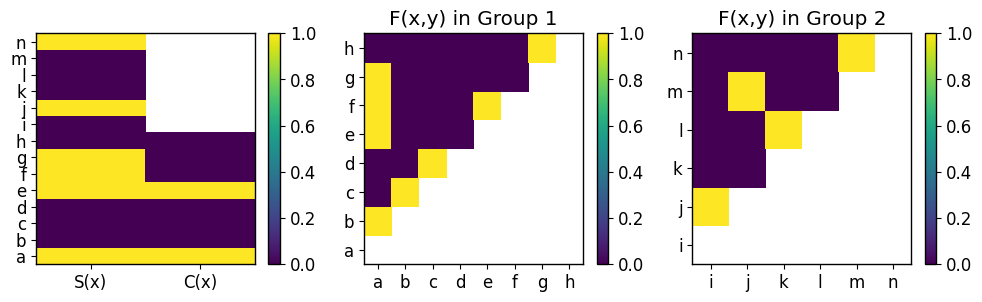

In [10]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

pd.options.display.max_rows=999
pd.options.display.max_columns=999
pd.set_option('display.width',1000)
pd.options.display.float_format = '{:,.2f}'.format

def plt_heatmap(df, vmin=None, vmax=None):
    plt.pcolor(df, vmin=vmin, vmax=vmax)
    plt.yticks(np.arange(0.5,len(df.index),1),df.index)
    plt.xticks(np.arange(0.5,len(df.columns),1),df.columns)
    plt.colorbar()

# pd.set_option('precision',2) # 原来的写法会报错
pd.set_option('display.precision',2)

df_smokes_cancer_facts = pd.DataFrame(
        np.array([[(x in smokes), (x in cancer) if x in g1 else math.nan] for x in g]),
        columns=["S(x)","C(x)"],
        index=list('abcdefghijklmn'))
df_friends_ah_facts = pd.DataFrame(
        np.array([[((x,y) in friends) if x<y else math.nan for x in g1] for y in g1]),
        index = list('abcdefgh'),
        columns = list('abcdefgh'))
df_friends_in_facts = pd.DataFrame(
        np.array([[((x,y) in friends) if x<y else math.nan for x in g2] for y in g2]),
        index = list('ijklmn'),
        columns = list('ijklmn'))

p = ltn.Variable("p", torch.stack([i.value for i in g.values()]))
q = ltn.Variable("q", torch.stack([i.value for i in g.values()]))

df_smokes_cancer = pd.DataFrame(
        # torch.stack([S(p).value, C(p).value], dim=1).detach().numpy(),
        torch.stack([S(p).value, C(p).value], dim=1).detach().cpu().numpy(),
        columns=["S(x)","C(x)"],
        index=list('abcdefghijklmn'))

pred_friends = F(p, q).value
df_friends_ah = pd.DataFrame(
        # pred_friends[:8,:8].detach().numpy(),
        pred_friends[:8,:8].detach().cpu().numpy(),
        index=list('abcdefgh'),
        columns=list('abcdefgh'))
df_friends_in = pd.DataFrame(
        # pred_friends[8:,8:].detach().numpy(),
        pred_friends[8:,8:].detach().cpu().numpy(),
        index=list('ijklmn'),
        columns=list('ijklmn'))
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

plt.figure(figsize=(12,3))
plt.subplot(131)
plt_heatmap(df_smokes_cancer_facts, vmin=0, vmax=1)
plt.subplot(132)
plt.title("F(x,y) in Group 1")
plt_heatmap(df_friends_ah_facts, vmin=0, vmax=1)
plt.subplot(133)
plt.title("F(x,y) in Group 2")
plt_heatmap(df_friends_in_facts, vmin=0, vmax=1)
#plt.savefig('ex_smokes_givenfacts.pdf')
plt.show()

Now, we plot the truth values for $S(x), C(x), F(x,y)$, obtained by querying the predicates on all individuals by using LTN after it has been trained for 1000 epochs.

现在，我们绘制 $S(x), C(x), F(x,y)$ 的真值，这些真值是通过在所有个体上查询谓词并使用训练了 1000 轮的 LTN 获得的。

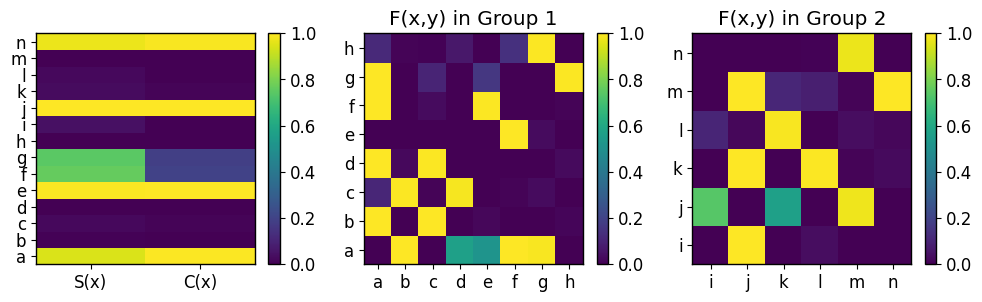

In [11]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt_heatmap(df_smokes_cancer, vmin=0, vmax=1)
plt.subplot(132)
plt.title("F(x,y) in Group 1")
plt_heatmap(df_friends_ah, vmin=0, vmax=1)
plt.subplot(133)
plt.title("F(x,y) in Group 2")
plt_heatmap(df_friends_in, vmin=0, vmax=1)
#plt.savefig('ex_smokes_inferfacts.pdf')
plt.show()

It is possible to observe the following:
- the friendship relations are learned as expected: $\forall x \text{ } (S(x) \implies C(x))$ (smoke implies cancer) is
inferred for group 2 even though such information was not present in the knowledge base;
- for group 1, the given facts for smoking and cancer for the individuals $f$ and $g$ are slightly altered, as these
were inconsistent with the rules. In fact, the rule for "smoking propagating via friendship" (\forall x, y \text{ } ((F(x, y) \land S(x)) \implies S(y))) is incompatible with
many of the given facts. Increasing the satisfaction of this rule would require decreasing the overall satisfaction of
the knowledge base, which explains why it is partly ignored by LTN during training.

Finally, looking at the training logs, it can be seen that as the grounding approaches satisfiability of the knowledge base,
$\phi_1$ approaches true, whereas $\phi_2$ approaches false, as expected.

可以观察到以下几点：
- 友谊关系如预期般被学习到了：$\forall x \text{ } (S(x) \implies C(x))$（吸烟意味着癌症）在第2组中被推断出来，尽管这些信息在知识库中并不存在；
- 对于第1组，给定的关于个体$f$和$g$的吸烟和癌症事实略有改变，因为这些与规则不一致。实际上，“通过友谊传播吸烟”的规则（$\forall x, y \text{ } ((F(x, y) \land S(x)) \implies S(y))$）与许多给定的事实不兼容。增加该规则的满足度将需要降低知识库的整体满足度，这解释了为什么LTN在训练过程中部分忽略了它。

最后，通过查看训练日志可以看到，当基础接近于知识库的可满足性时，$\phi_1$ 接近于真，而 $\phi_2$ 接近于假，正如预期的那样。